In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
# img=cv2.imread('./dataset/lionel_messi/messiface1.jpg')
# img.shape

In [16]:
# plt.imshow(img)

In [17]:
# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray.shape
# plt.imshow(gray,cmap='gray')

In [18]:
face_cascade= cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade= cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
# faces= face_cascade.detectMultiScale(gray,1.3,5)
# # faces

In [19]:
# (x,y,w,h)=faces[0]
# x,y,w,h
# print(len(faces[0]))

In [20]:
# face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
# plt.imshow(face_img)

In [21]:
# cv2.destroyAllWindows()
# for (x,y,w,h) in faces:
#     # face_img = cv2.rectangle(img,(x,w),(x+w,y+h),(255,0,0),2)
#     roi_gray= gray[y:y+h,x:x+w]
#     roi_color= face_img[y:y+h,x:x+w]
#     eyes =eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,),2)
    
# plt.figure()
# plt.imshow(face_img,cmap='gray')
# plt.show()

In [22]:
# plt.imshow(roi_color)

In [23]:
def get_cropped_img_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray= gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes= eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [24]:
# messi_img=cv2.imread('./dataset/lionel_messi/messi.jpg')
# plt.imshow(messi_img)

In [25]:
# cropped_img=get_cropped_img_2_eyes('.\dataset\lionel_messi\messi.jpg')
# # plt.imshow(cropped_img)
# print(cropped_img)

In [26]:
# cropped_img_r=get_cropped_img_2_eyes('.\\dataset\\cristiano_ronaldo\\ronaldoface.jpg')
# plt.imshow(cropped_img_r)
# cv2.imwrite('.\\dataset\\ronaldoface.jpg',cropped_img_r)

In [27]:
path_to_data='.\\dataset'
path_to_crdata='.\\dataset\\cropped\\'

In [28]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        folder_path=entry.path
        folder_name=folder_path.split('\\')[-1]
        if folder_name!="cropped":
            img_dirs.append(entry.path)
img_dirs

['.\\dataset\\cristiano_ronaldo',
 '.\\dataset\\lionel_messi',
 '.\\dataset\\neymar']

In [29]:
import shutil

if os.path.exists(path_to_crdata):
    shutil.rmtree(path_to_crdata)
os.mkdir(path_to_crdata)

In [30]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
 
for img_dir in img_dirs:
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    count=1
    number=1
    for entry in os.scandir(img_dir):
        print(number)
        print(entry.path)
        roi_color=get_cropped_img_2_eyes(entry.path)
        # roi_color=cv2.imencode('.png',roi_color_rext)
        # plt.imshow(roi_color)
        if roi_color is not None:
            cropped_folder=path_to_crdata+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating image folder:",cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            print("filename:",cropped_file_name)
            cropped_file_path=cropped_folder+"\\"+cropped_file_name
            print("filepath:",cropped_file_path)
            cv2.imwrite(cropped_file_path,roi_color)
            print("done")
            celebrity_file_names_dict.setdefault(celebrity_name,[]).append(cropped_file_path)
            count+=1
            number+=1      


cristiano_ronaldo
1
.\dataset\cristiano_ronaldo\000_32MA9QH.jpg
Generating image folder: .\dataset\cropped\cristiano_ronaldo
filename: cristiano_ronaldo1.png
filepath: .\dataset\cropped\cristiano_ronaldo\cristiano_ronaldo1.png
done
2
.\dataset\cristiano_ronaldo\01-9.jpg
filename: cristiano_ronaldo2.png
filepath: .\dataset\cropped\cristiano_ronaldo\cristiano_ronaldo2.png
done
3
.\dataset\cristiano_ronaldo\0_Chelsea-target-Cristiano-Ronaldo-in-recent-Nations-League-action-for-Portugal.jpg
filename: cristiano_ronaldo3.png
filepath: .\dataset\cropped\cristiano_ronaldo\cristiano_ronaldo3.png
done
4
.\dataset\cristiano_ronaldo\1150780.jpg
4
.\dataset\cristiano_ronaldo\13029.jpg
filename: cristiano_ronaldo4.png
filepath: .\dataset\cropped\cristiano_ronaldo\cristiano_ronaldo4.png
done
5
.\dataset\cristiano_ronaldo\2022-group-h-match-portugal-779033372.webp
filename: cristiano_ronaldo5.png
filepath: .\dataset\cropped\cristiano_ronaldo\cristiano_ronaldo5.png
done
6
.\dataset\cristiano_ronaldo\22

In [31]:
celebrity_file_names_dict
cropped_image_dirs

['.\\dataset\\cropped\\cristiano_ronaldo',
 '.\\dataset\\cropped\\lionel_messi',
 '.\\dataset\\cropped\\neymar']

In [32]:
#rebuilding celebrity file names dictionary because we manually deleted some
cropped_celebrity_file_dict={}
for img_dir in cropped_image_dirs:
    celebrity=img_dir.split('\\')[-1]
    # print(celebrity)
    for img in os.scandir(img_dir):
        cropped_celebrity_file_dict.setdefault(celebrity,[]).append(img.path)

cropped_celebrity_file_dict

{'cristiano_ronaldo': ['.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo1.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo10.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo11.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo12.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo13.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo14.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo15.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo16.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo17.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo18.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo19.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo2.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo20.png',
  '.\\dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo21.png',
  '.\\dataset\\

In [33]:
import pywt
import cv2
import numpy as np


def w2d(img,mode='haar',level=1):

    imArray=img

    imArray=cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray=np.float32(imArray)
    imArray/=255

    coeff=pywt.wavedec2(imArray,mode,level=level)

    coeff_H=list(coeff)
    coeff_H[0]*=0

    imArray_H= pywt.waverec2(coeff_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    

In [34]:
# img=get_cropped_img_2_eyes('./dataset/lionel_messi/messiface1.jpg')
# im_har=w2d(img,'db1',5)
# plt.imshow(im_har,cmap='gray')

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [35]:
class_dict={}
count=0
for celebrity_key in cropped_celebrity_file_dict.keys():
    class_dict.setdefault(celebrity_key,[])
    class_dict[celebrity_key]=count
    count+=1
class_dict

{'cristiano_ronaldo': 0, 'lionel_messi': 1, 'neymar': 2}

In [36]:
X,y=[],[]

for celebrity_name,training_files in cropped_celebrity_file_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_har_img=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrity_name)

In [37]:
print(len(X))

81


In [38]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(81, 4096)

In [39]:
X[0]

array([60., 55., 56., ...,  2.,  8.,  2.])

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7142857142857143

In [42]:
len(X_test)
print(classification_report(y_test,pipe.predict(X_test)))

                   precision    recall  f1-score   support

cristiano_ronaldo       0.56      1.00      0.71         5
     lionel_messi       0.75      0.75      0.75         8
           neymar       1.00      0.50      0.67         8

         accuracy                           0.71        21
        macro avg       0.77      0.75      0.71        21
     weighted avg       0.80      0.71      0.71        21



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [59]:
models={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
    'model':LogisticRegression(),
    'params':{
        'logisticregression__C': [0.1, 1.0, 10.0],
        }
    }
}

In [62]:
scores=[]
best_estimators={}
import pandas as pd

for algo,mp in models.items():
    pipe =make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators.setdefault(algo,[])
    best_estimators[algo]=clf.best_estimator_
    df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
  

In [63]:
df

,model,best_score,best_params
0,svm,0.733333,{'svc__kernel': 'linear'}
1,random_forest,0.616667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.750000,{'logisticregression__C': 0.1}


In [69]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=0.1))])}

In [76]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', probability=True))])

In [84]:
best_estimators['svm'].score(X_test,y_test)

In [79]:
best_estimators['logistic_regression']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])

In [80]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8095238095238095

In [81]:
best_estimators['random_forest'].score(X_test,y_test)

0.5714285714285714

In [93]:
best_clf=best_estimators['svm']
X_test.shape

(21, 4096)

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm


array([[5, 0, 0],
       [2, 6, 0],
       [1, 1, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

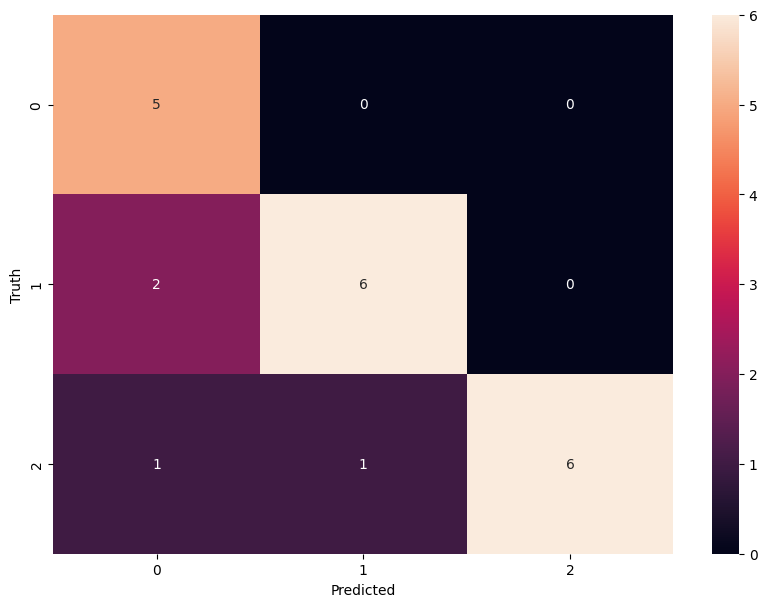

In [92]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [94]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json 
with open('class_dictionary.json',"w") as f:
    f.write(json.dumps(class_dict))